In [1]:
%matplotlib inline
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


stats_data = pd.read_csv("C:/Users/lalit/project_1/HealthCareAnalytics/share-of-adults-defined-as-obese.csv")
stats_data_filtered=stats_data[stats_data["Year"].isin (["2004","2005","2006","2007","2008","2009","2010",\
                                                         "2011","2012","2013","2014"])]

stats_data_filtered.reset_index(drop=True)
Obese_countries_2014= stats_data[stats_data["Year"].isin(["2014"])]
Obese_country_sorted=Obese_countries_2014.sort_values(by='% Obese', ascending=False, na_position='first')
Obese_country_sorted.reset_index(drop=True)
           

Entity Code  Year  % Obese
0                           Nauru  NRU  2014     60.3
1                    Cook Islands  COK  2014     54.9
2                           Palau  PLW  2014     54.2
3                Marshall Islands  MHL  2014     51.8
4                          Tuvalu  TUV  2014     50.1
5                            Niue  NIU  2014     48.4
6                           Tonga  TON  2014     46.8
7                           Samoa  WSM  2014     46.0
8                        Kiribati  KIR  2014     44.7
9            Micronesia (country)  FSM  2014     44.4
10                         Kuwait  KWT  2014     36.8
11                  United States  USA  2014     34.9
12                         Jordan  JOR  2014     34.3
13                   Saudi Arabia  SAU  2014     34.1
14                          Qatar  QAT  2014     33.8
15                          Libya  LBY  2014     31.3
16                         Turkey  TUR  2014     30.8
17                        Lebanon  LBN  2014     30.8
18                          Egypt  EGY  2014     30.6
19                        Bahamas  BHS  2014     30.5
20           United Arab Emirates  ARE  2014     30.3
21                    New Zealand  NZL  2014     29.6
22                           Iraq  IRQ  2014     29.2
23                           Fiji  FJI  2014     28.9
24                        Bahrain  BHR  2014     28.8
25                         Canada  CAN  2014     28.3
26                          Malta  MLT  2014     28.2
27                      Australia  AUS  2014     27.9
28                         Mexico  MEX  2014     27.8
29                      Argentina  ARG  2014     27.3
..                            ...  ...   ...      ...
161                   North Korea  PRK  2014      6.3
162  Democratic Republic of Congo  COD  2014      6.1
163                     Indonesia  IDN  2014      6.1
164                   Philippines  PHL  2014      5.9
165                Sudan (former)  NaN  2014      5.8
166                     Singapore  SGP  2014      5.8
167                        Bhutan  BTN  2014      5.7
168                          Chad  TCD  2014      5.6
169                         China  CHN  2014      5.5
170                        Rwanda  RWA  2014      5.3
171                        Malawi  MWI  2014      5.3
172                       Myanmar  MMR  2014      5.1
173                         Niger  NER  2014      5.0
174                  Burkina Faso  BFA  2014      5.0
175                       Burundi  BDI  2014      4.9
176                   Afghanistan  AFG  2014      4.9
177                    Madagascar  MDG  2014      4.8
178                        Uganda  UGA  2014      4.8
179                          Laos  LAO  2014      4.7
180                     Sri Lanka  LKA  2014      4.6
181                       Eritrea  ERI  2014      4.5
182                   South Korea  KOR  2014      4.4
183                      Ethiopia  ETH  2014      4.0
184                         Japan  JPN  2014      3.9
185                         Nepal  NPL  2014      3.7
186                         India  IND  2014      3.5
187                      Cambodia  KHM  2014      3.5
188                         Timor  TLS  2014      3.3
189                    Bangladesh  BGD  2014      3.2
190                       Vietnam  VNM  2014      1.8

[191 rows x 4 columns]

In [2]:
plotly.offline.init_notebook_mode()

scl = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], \
                   [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'],\
            [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'],\
       [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], \
       [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']]

data = [dict(type='choropleth',
             colorscale = scl,
             autocolorscale = False,

            locations = Obese_countries_2014['Code'].astype(str),
             z=Obese_countries_2014['% Obese'].astype(float), 
             locationmode="ISO-3", 
             marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Percentage of People Obese"))]

layout = dict(
         title="2014 Share of Obese People Around the World", \
        
         geo=dict(scope='world', 
                       projection={'type': 'natural earth'})
              )
fig = dict(data=data, 
           layout=layout)
        

plotly.offline.iplot(fig)


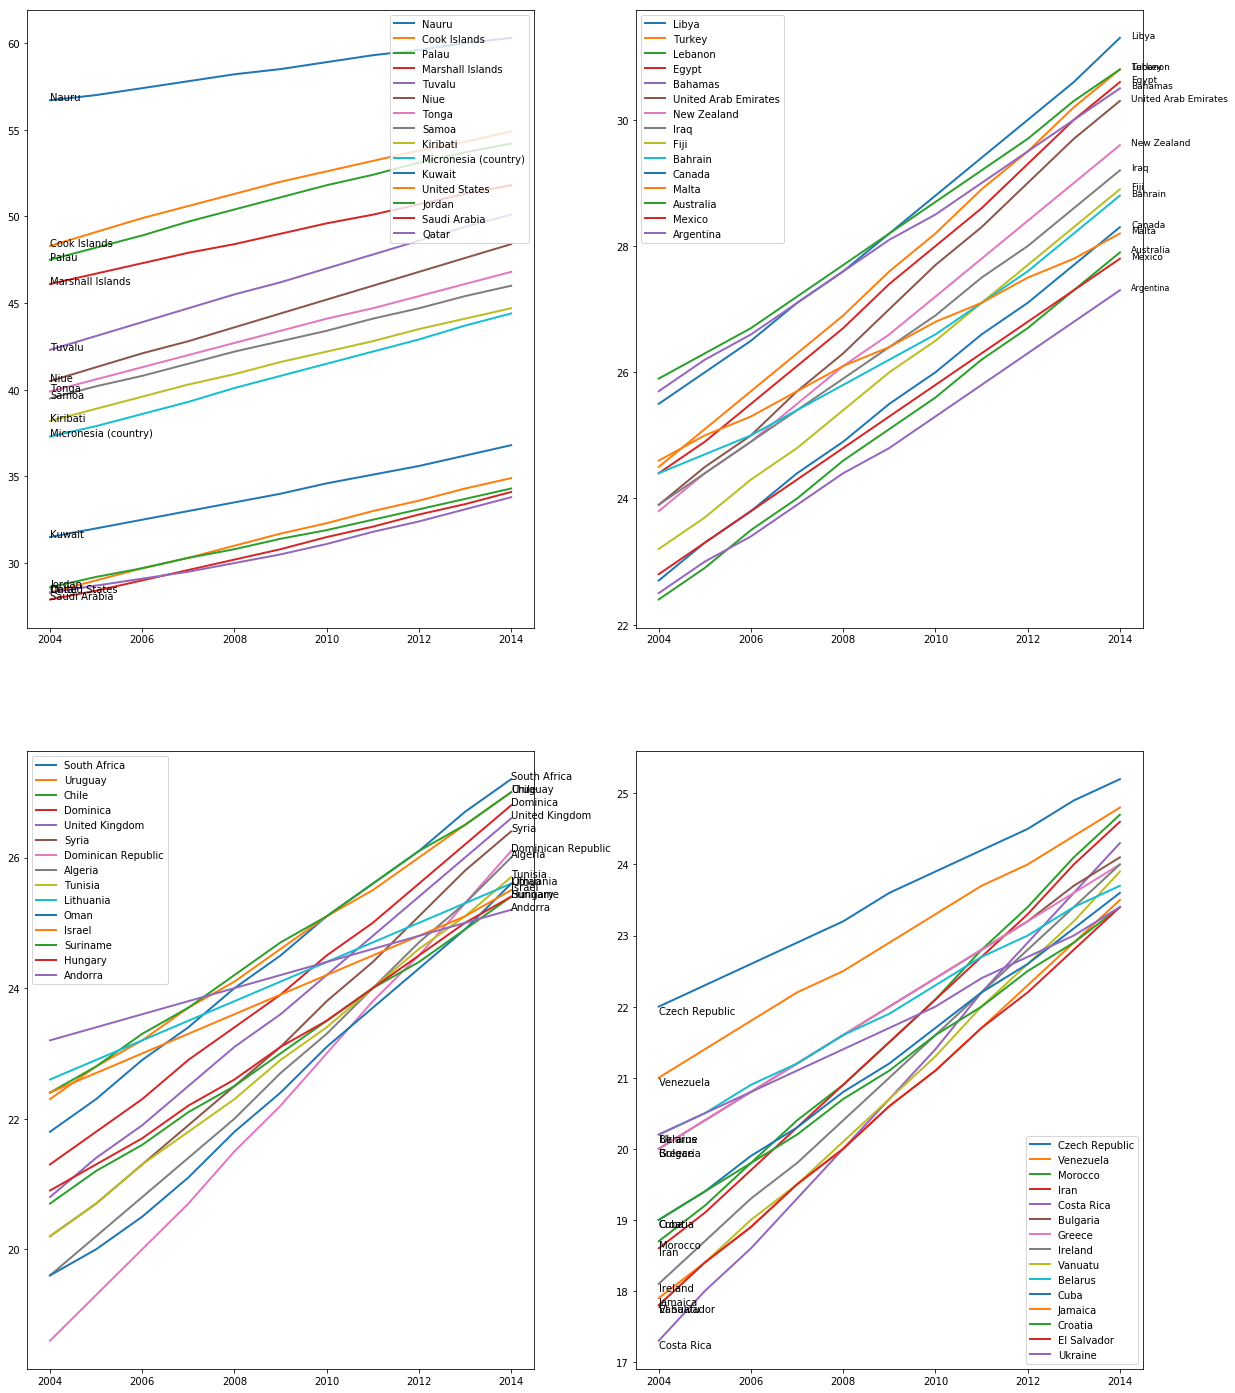

In [3]:
Countries_to_analyse=list(Obese_country_sorted["Entity"].head(n=60))
Countries_top_60=list(Obese_country_sorted["Code"].head(n=60))
Countries_bmi_trend=stats_data_filtered[stats_data_filtered["Entity"].isin(Countries_to_analyse)]
Countries_bmi_trend.reset_index(drop=True)

fig = plt.figure(figsize=(20,25))
#fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15,15))


for i in range(0 ,60):
    y=Countries_bmi_trend[Countries_bmi_trend['Entity']==Countries_to_analyse[i]]
    
    if i < 15:
        ax1=fig.add_subplot(221)
        line1 = ax1.plot(y['Year'], y['% Obese'], '-', linewidth=2,label=Countries_to_analyse[i])
        text1=ax1.annotate(Countries_to_analyse[i],(y["Year"].min(),y["% Obese"].min()))
        text1.set_fontsize(10)
          
    elif i < 30:
        ax2=fig.add_subplot(222)
        line2=ax2.plot(y['Year'], y['% Obese'], '-', linewidth=2,label=Countries_to_analyse[i])
        text2=ax2.annotate(Countries_to_analyse[i],(y["Year"].max()+0.25,y["% Obese"].max())) 
        text2.set_fontsize(9)
    elif i < 45:
        ax3=fig.add_subplot(223)
        line3=ax3.plot(y['Year'], y['% Obese'], '-', linewidth=2,label=Countries_to_analyse[i])
        ax3.annotate(Countries_to_analyse[i],(y["Year"].max(),y["% Obese"].max()))
        text2.set_fontsize(8)
    elif i < 60:
        ax4=fig.add_subplot(224)
        line4=ax4.plot(y['Year'], y['% Obese'], '-', linewidth=2,label=Countries_to_analyse[i])
        ax4.annotate(Countries_to_analyse[i],(y["Year"].min(),y["% Obese"].min()-0.1))
ax1.legend(loc='upper right')
ax2.legend(loc='best')
ax3.legend(loc='best')
plt.legend()

plt.show()


Text(69.0, 0.5, 'Country')

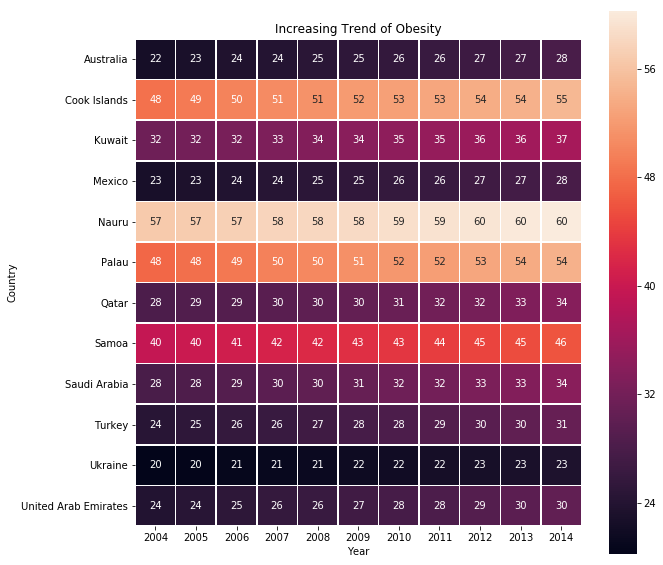

In [4]:
# Heat Map For the top 50 Countries 

List_to_show=["Australia","Austria","Kuwait","Mexico","Qatar","Saudi Arabia","Turkey","Ukraine",\
              "United Arab Emirates","Samoa","Nauru","Palau","Cook Islands"]

Countries_bmi_trend_final=Countries_bmi_trend[Countries_bmi_trend["Entity"].isin(List_to_show)]
Countries_bmi_trend_final.to_csv("C:/DataAnalytics/bmi_trend")

df=Countries_bmi_trend_final.pivot('Entity','Year','% Obese')

fig, ax = plt.subplots(figsize=(10,10))   
ax=sns.heatmap(df.iloc[:, 0:12], annot=True, linewidths=.5,square=True)
ax.set_title('Increasing Trend of Obesity')
ax.set_ylabel("Country")

In [5]:
Countries_bmi_trend

Entity Code  Year  % Obese
113     Algeria  DZA  2004     19.6
114     Algeria  DZA  2005     20.2
115     Algeria  DZA  2006     20.8
116     Algeria  DZA  2007     21.4
117     Algeria  DZA  2008     22.0
118     Algeria  DZA  2009     22.7
119     Algeria  DZA  2010     23.3
120     Algeria  DZA  2011     24.0
121     Algeria  DZA  2012     24.7
122     Algeria  DZA  2013     25.3
123     Algeria  DZA  2014     26.0
155     Andorra  AND  2004     23.2
156     Andorra  AND  2005     23.4
157     Andorra  AND  2006     23.6
158     Andorra  AND  2007     23.8
159     Andorra  AND  2008     24.0
160     Andorra  AND  2009     24.2
161     Andorra  AND  2010     24.4
162     Andorra  AND  2011     24.6
163     Andorra  AND  2012     24.8
164     Andorra  AND  2013     25.0
165     Andorra  AND  2014     25.2
281   Argentina  ARG  2004     22.5
282   Argentina  ARG  2005     23.0
283   Argentina  ARG  2006     23.4
284   Argentina  ARG  2007     23.9
285   Argentina  ARG  2008     24.4
286   Argentina  ARG  2009     24.8
287   Argentina  ARG  2010     25.3
288   Argentina  ARG  2011     25.8
...         ...  ...   ...      ...
7718    Uruguay  URY  2007     23.7
7719    Uruguay  URY  2008     24.1
7720    Uruguay  URY  2009     24.6
7721    Uruguay  URY  2010     25.1
7722    Uruguay  URY  2011     25.5
7723    Uruguay  URY  2012     26.0
7724    Uruguay  URY  2013     26.5
7725    Uruguay  URY  2014     27.0
7799    Vanuatu  VUT  2004     17.8
7800    Vanuatu  VUT  2005     18.4
7801    Vanuatu  VUT  2006     19.0
7802    Vanuatu  VUT  2007     19.5
7803    Vanuatu  VUT  2008     20.1
7804    Vanuatu  VUT  2009     20.7
7805    Vanuatu  VUT  2010     21.3
7806    Vanuatu  VUT  2011     22.0
7807    Vanuatu  VUT  2012     22.6
7808    Vanuatu  VUT  2013     23.2
7809    Vanuatu  VUT  2014     23.9
7841  Venezuela  VEN  2004     21.0
7842  Venezuela  VEN  2005     21.4
7843  Venezuela  VEN  2006     21.8
7844  Venezuela  VEN  2007     22.2
7845  Venezuela  VEN  2008     22.5
7846  Venezuela  VEN  2009     22.9
7847  Venezuela  VEN  2010     23.3
7848  Venezuela  VEN  2011     23.7
7849  Venezuela  VEN  2012     24.0
7850  Venezuela  VEN  2013     24.4
7851  Venezuela  VEN  2014     24.8

[660 rows x 4 columns]

In [6]:
# TOp 30% Most Obese nations(2005-2009)


# get Obese data by yesr 2005-2009
Obese_filtered=stats_data[stats_data["Year"].isin (["2005","2006","2007","2008","2009"])]
# Get Average for 5 years
Obese_filtered_grp=Obese_filtered.groupby(["Code"]).mean().reset_index()
# rename columns
Obese_filtered_grp.drop(["Year"],axis=1,inplace=True)
Obese_filtered_final=Obese_filtered_grp.rename(columns={'Code':'Country Code'})
Obese_filtered_final.rename(columns={"Percentage":"% Obese"},inplace=True)

# Sample pop in 2009 from obese 
Obese_sample_pop=Obese_filtered_final[Obese_filtered_final["Country Code"].isin(Countries_top_60)]

#Rest of the population from non obese 
Obese_rest_pop=Obese_filtered_final[~Obese_filtered_final["Country Code"].isin(Countries_top_60)]
#Obese_rest_pop["Country Code"].nunique()

Obese_sample_pop


Country Code  % Obese
3            AND    23.80
4            ARE    25.70
5            ARG    23.90
8            AUS    24.02
16           BGR    21.20
17           BHR    25.42
18           BHS    27.12
20           BLR    21.22
29           CAN    24.38
31           CHL    23.74
37           COK    50.58
41           CRI    19.32
42           CUB    20.32
44           CZE    22.92
47           DMA    22.86
49           DOM    20.74
50           DZA    21.42
52           EGY    26.12
58           FJI    24.84
60           FSM    39.34
62           GBR    22.50
69           GRC    21.20
74           HRV    20.24
76           HUN    22.18
79           IRL    19.84
80           IRN    20.30
81           IRQ    25.40
83           ISR    23.30
85           JAM    19.48
86           JOR    30.28
92           KIR    40.26
95           KWT    33.00
97           LBN    27.22
99           LBY    27.08
103          LTU    23.50
106          MAR    20.36
110          MEX    24.30
111          MHL    47.86
114          MLT    25.70
127          NIU    42.84
131          NRU    57.78
132          NZL    25.50
133          OMN    21.16
138          PLW    49.66
144          QAT    29.56
148          SAU    29.60
153          SLV    19.48
157          SUR    22.08
163          SYR    21.90
170          TON    42.00
172          TUN    21.80
173          TUR    26.32
174          TUV    44.68
177          UKR    21.10
178          URY    23.68
179          USA    30.34
182          VEN    22.16
184          VUT    19.54
185          WSM    41.50
187          ZAF    23.42

In [7]:
Obese_filtered_2014=stats_data[stats_data["Year"].isin (["2010","2011","2012","2013","2014"])]
Obese_filtered_grp_2014=Obese_filtered_2014.groupby(["Code"]).mean().reset_index()

Obese_filtered_grp_2014.drop(["Year"],axis=1,inplace=True)
Obese_filtered_final_2014=Obese_filtered_grp_2014.rename(columns={'Code':'Country Code'})
Obese_filtered_final_2014.rename(columns={"Percentage":"% Obese"},inplace=True)


Obese_sample_pop_2014=Obese_filtered_final_2014[Obese_filtered_final_2014["Country Code"].isin(Countries_top_60)]
#Obese_sample_pop["Country Code"].nunique()

Obese_rest_pop_2014=Obese_filtered_final_2014[~Obese_filtered_final_2014["Country Code"].isin(Countries_top_60)]
#Obese_rest_pop_2014["Country Code"].nunique()

#Obese_rest_pop_2014


In [8]:
Health_expenses_df=pd.read_csv("C:/DataAnalytics/Health_expenditures.csv")
Health_expenses_df

Country Name Country Code  \
0                       Afghanistan          AFG   
1                           Albania          ALB   
2                           Algeria          DZA   
3                           Andorra          ADO   
4                            Angola          AGO   
5               Antigua and Barbuda          ATG   
6                         Argentina          ARG   
7                           Armenia          ARM   
8                         Australia          AUS   
9                           Austria          AUT   
10                       Azerbaijan          AZE   
11                     Bahamas, The          BHS   
12                          Bahrain          BHR   
13                       Bangladesh          BGD   
14                         Barbados          BRB   
15                          Belarus          BLR   
16                          Belgium          BEL   
17                           Belize          BLZ   
18                            Benin          BEN   
19                           Bhutan          BTN   
20                          Bolivia          BOL   
21           Bosnia and Herzegovina          BIH   
22                         Botswana          BWA   
23                           Brazil          BRA   
24                Brunei Darussalam          BRN   
25                         Bulgaria          BGR   
26                     Burkina Faso          BFA   
27                          Burundi          BDI   
28                       Cabo Verde          CPV   
29                         Cambodia          KHM   
..                              ...          ...   
158  St. Vincent and the Grenadines          VCT   
159                           Sudan          SDN   
160                        Suriname          SUR   
161                       Swaziland          SWZ   
162                          Sweden          SWE   
163                     Switzerland          CHE   
164            Syrian Arab Republic          SYR   
165                      Tajikistan          TJK   
166                        Tanzania          TZA   
167                        Thailand          THA   
168                     Timor-Leste          TMP   
169                            Togo          TGO   
170                           Tonga          TON   
171             Trinidad and Tobago          TTO   
172                         Tunisia          TUN   
173                          Turkey          TUR   
174                    Turkmenistan          TKM   
175                          Tuvalu          TUV   
176                          Uganda          UGA   
177                         Ukraine          UKR   
178            United Arab Emirates          ARE   
179                  United Kingdom          GBR   
180                   United States          USA   
181                         Uruguay          URY   
182                      Uzbekistan          UZB   
183                         Vanuatu          VUT   
184                   Venezuela, RB          VEN   
185                         Vietnam          VNM   
186                     Yemen, Rep.          YEM   
187                          Zambia          ZMB   

                                        Indicator Name     Indicator Code  \
0    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
1    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
2    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
3    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
4    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
5    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
6    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
7    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
8    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
9    Health expenditure, pub

In [9]:
Countries_top_60=list(Obese_country_sorted["Code"].head(n=60))

Health_expenses_df_filtered=Health_expenses_df[Health_expenses_df["Country Code"].isin(Countries_top_60)]
Health_expenses_df_filtered.dropna(how='any',inplace=True)
#Health_expenses_df_filtered
Health_expenses_top30=Health_expenses_df_filtered[["Country Name","Country Code","2005","2006","2007","2008","2009"]].copy()
Health_expenses_top30["Average"]=Health_expenses_df[["2005","2006","2007","2008","2009"]].mean(axis=1)
Health_expenses_top30["Country Code"].nunique()
HE_OB_plot_top30=pd.merge(Health_expenses_top30,Obese_sample_pop,how="inner",on=["Country Code"])
HE_OB_plot_top30

Country Name Country Code       2005       2006       2007  \
0                 Algeria          DZA   8.191101   7.804500   8.140561   
1               Argentina          ARG  16.671587  16.350931  15.367370   
2               Australia          AUS  16.947054  17.132578  17.481715   
3            Bahamas, The          BHS  14.736412  17.138946  16.804872   
4                 Bahrain          BHR   8.649486   8.812304   9.354808   
5                 Belarus          BLR  10.455741   9.468805   9.081485   
6                Bulgaria          BGR  11.718312  11.266710   9.971421   
7                  Canada          CAN  17.500471  17.578872  17.844653   
8                   Chile          CHL  12.541576  13.453038  13.715483   
9              Costa Rica          CRI  21.346303  22.056016  24.633616   
10                Croatia          HRV  13.656729  13.691531  14.909077   
11                   Cuba          CUB  13.731570  11.206697  14.482429   
12         Czech Republic          CZE  14.076873  13.833194  13.539600   
13               Dominica          DMA   7.942399  10.669951   8.244809   
14     Dominican Republic          DOM   7.866713   9.020373  10.610839   
15       Egypt, Arab Rep.          EGY   6.052391   6.057076   5.803580   
16            El Salvador          SLV  15.539479  15.908574  15.623528   
17                   Fiji          FJI  10.755043  10.385623  10.226365   
18                 Greece          GRC  12.351010  12.835226  12.062669   
19                Hungary          HUN  11.804295  11.040508  10.182364   
20     Iran, Islamic Rep.          IRN   9.554350  10.159772  11.370916   
21                   Iraq          IRQ   3.197723   3.200376   4.689827   
22                Ireland          IRL  16.538451  16.079081  15.964246   
23                 Israel          ISR   9.608819  10.532088  10.675540   
24                Jamaica          JAM   3.524447   4.496515   5.537119   
25                 Jordan          JOR  12.256637  12.347110  13.508678   
26               Kiribati          KIR   9.195804  10.577236  13.093073   
27                 Kuwait          KWT   6.750535   5.722297   5.576511   
28                Lebanon          LBN  11.799047   9.948476  10.451040   
29                  Libya          LBY   5.780625   5.275487   4.815072   
30              Lithuania          LTU  11.621837  12.595643  12.862380   
31                  Malta          MLT  14.193705  14.283979  13.309158   
32       Marshall Islands          MHL  18.932710  25.061224  23.989091   
33                 Mexico          MEX  12.047194  11.184444  11.333636   
34  Micronesia, Fed. Sts.          FSM  19.080972  18.269634  18.804090   
35                Morocco          MAR   4.433143   5.831203   6.315385   
36                  Nauru          NRU  18.518519  18.518519  18.518519   
37            New Zealand          NZL  17.687811  18.055147  18.064431   
38                   Oman          OMN   6.089415   5.423049   5.581935   
39                  Palau          PLW  15.980263  15.062500  14.190510   
40                  Qatar          QAT   8.094180   7.168687   6.537556   
41                  Samoa          WSM  11.178660  13.971639  14.083068   
42           Saudi Arabia          SAU   8.125726   9.011345   7.943066   
43           South Africa          ZAF  13.009119  13.002055  13.152082   
44               Suriname          SUR  11.648623  13.790531  11.891785   
45   Syrian Arab Republic          SYR   7.366401   6.962556   6.962556   
46                  Tonga          TON  26.594245  17.407679  19.035712   
47                Tunisia          TUN  11.878036  12.455103  12.431306   
48                 Turkey          TUR  11.282224  12.038545  11.800242   
49                 Tuvalu          TUV  22.874667  23.135866  21.653758   
50                Ukraine          UKR  11.888764  12.062659  12.532517   
51   United Arab Emirates          ARE   8.694868   8.846775   8.810033   
52         United Kingdom          GBR

In [10]:

Health_expenses_rest= Health_expenses_df[~Health_expenses_df["Country Code"].isin(Countries_top_60)]
Health_expenses_rest.dropna(how='any',inplace=True)
Health_expenses_rest["Average"]=Health_expenses_rest[["2005","2006","2007","2008","2009"]].mean(axis=1)
#Health_expenses_rest["Country Code"].nunique()
Health_expenses_rest

Country Name Country Code  \
0                       Afghanistan          AFG   
1                           Albania          ALB   
3                           Andorra          ADO   
4                            Angola          AGO   
5               Antigua and Barbuda          ATG   
7                           Armenia          ARM   
9                           Austria          AUT   
10                       Azerbaijan          AZE   
13                       Bangladesh          BGD   
14                         Barbados          BRB   
16                          Belgium          BEL   
17                           Belize          BLZ   
18                            Benin          BEN   
19                           Bhutan          BTN   
20                          Bolivia          BOL   
21           Bosnia and Herzegovina          BIH   
22                         Botswana          BWA   
23                           Brazil          BRA   
24                Brunei Darussalam          BRN   
26                     Burkina Faso          BFA   
27                          Burundi          BDI   
28                       Cabo Verde          CPV   
29                         Cambodia          KHM   
30                         Cameroon          CMR   
32         Central African Republic          CAF   
33                             Chad          TCD   
35                            China          CHN   
36                         Colombia          COL   
37                          Comoros          COM   
38                 Congo, Dem. Rep.          ZAR   
..                              ...          ...   
143           Sao Tome and Principe          STP   
145                         Senegal          SEN   
146                          Serbia          SRB   
147                      Seychelles          SYC   
148                    Sierra Leone          SLE   
149                       Singapore          SGP   
150                 Slovak Republic          SVK   
151                        Slovenia          SVN   
152                 Solomon Islands          SLB   
154                           Spain          ESP   
155                       Sri Lanka          LKA   
156             St. Kitts and Nevis          KNA   
157                       St. Lucia          LCA   
158  St. Vincent and the Grenadines          VCT   
159                           Sudan          SDN   
161                       Swaziland          SWZ   
162                          Sweden          SWE   
163                     Switzerland          CHE   
165                      Tajikistan          TJK   
166                        Tanzania          TZA   
167                        Thailand          THA   
168                     Timor-Leste          TMP   
169                            Togo          TGO   
171             Trinidad and Tobago          TTO   
174                    Turkmenistan          TKM   
176                          Uganda          UGA   
182                      Uzbekistan          UZB   
185                         Vietnam          VNM   
186                     Yemen, Rep.          YEM   
187                          Zambia          ZMB   

                                        Indicator Name     Indicator Code  \
0    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
1    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
3    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
4    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
5    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
7    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
9    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
10   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
13   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
14   Health expenditure, pub

In [11]:
HE_OB_plot_rest=pd.merge(Health_expenses_rest,Obese_rest_pop,how="inner",on=["Country Code"])


Text(0.5, 1.0, 'Govt Health Care expenses to Obesity (2004-2009)')

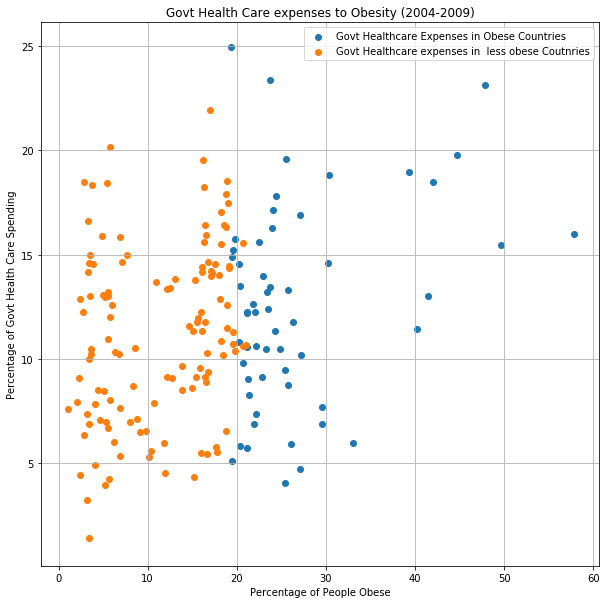

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(HE_OB_plot_top30["% Obese"], HE_OB_plot_top30["Average"], label="Govt Healthcare Expenses in Obese Countries ")
plt.scatter(HE_OB_plot_rest["% Obese"], HE_OB_plot_rest["Average"] ,label="Govt Healthcare expenses in  less obese Coutnries")
plt.grid()
plt.legend()
plt.ylabel("Percentage of Govt Health Care Spending")
plt.xlabel("Percentage of People Obese")
plt.title("Govt Health Care expenses to Obesity (2004-2009)")


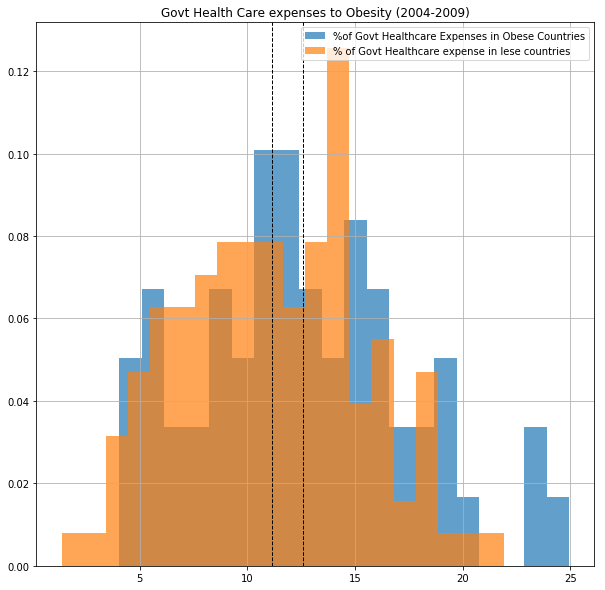

In [13]:
 # Histogram Plot of Data
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.hist(HE_OB_plot_top30["Average"], 20, density=True, alpha=0.7, label="%of Govt Healthcare Expenses in Obese Countries")
    plt.hist(HE_OB_plot_rest["Average"], 20, density=True, alpha=0.7, label="% of Govt Healthcare expense in lese countries")
    plt.axvline(HE_OB_plot_top30["Average"].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(HE_OB_plot_rest["Average"].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()
    plt.title("Govt Health Care expenses to Obesity (2004-2009)")
    plt.show()

In [14]:
stats.ttest_ind(HE_OB_plot_top30["Average"], HE_OB_plot_rest["Average"], equal_var=False)

Ttest_indResult(statistic=1.8896719909152098, pvalue=0.061825044891062046)

In [15]:
Health_expenses_df_filtered

Country Name Country Code  \
2                  Algeria          DZA   
6                Argentina          ARG   
8                Australia          AUS   
11            Bahamas, The          BHS   
12                 Bahrain          BHR   
15                 Belarus          BLR   
25                Bulgaria          BGR   
31                  Canada          CAN   
34                   Chile          CHL   
40              Costa Rica          CRI   
42                 Croatia          HRV   
43                    Cuba          CUB   
45          Czech Republic          CZE   
48                Dominica          DMA   
49      Dominican Republic          DOM   
51        Egypt, Arab Rep.          EGY   
52             El Salvador          SLV   
57                    Fiji          FJI   
65                  Greece          GRC   
73                 Hungary          HUN   
77      Iran, Islamic Rep.          IRN   
78                    Iraq          IRQ   
79                 Ireland          IRL   
80                  Israel          ISR   
82                 Jamaica          JAM   
84                  Jordan          JOR   
87                Kiribati          KIR   
89                  Kuwait          KWT   
93                 Lebanon          LBN   
96                   Libya          LBY   
97               Lithuania          LTU   
105                  Malta          MLT   
106       Marshall Islands          MHL   
109                 Mexico          MEX   
110  Micronesia, Fed. Sts.          FSM   
115                Morocco          MAR   
119                  Nauru          NRU   
122            New Zealand          NZL   
127                   Oman          OMN   
129                  Palau          PLW   
137                  Qatar          QAT   
141                  Samoa          WSM   
144           Saudi Arabia          SAU   
153           South Africa          ZAF   
160               Suriname          SUR   
164   Syrian Arab Republic          SYR   
170                  Tonga          TON   
172                Tunisia          TUN   
173                 Turkey          TUR   
175                 Tuvalu          TUV   
177                Ukraine          UKR   
178   United Arab Emirates          ARE   
179         United Kingdom          GBR   
180          United States          USA   
181                Uruguay          URY   
183                Vanuatu          VUT   
184          Venezuela, RB          VEN   

                                        Indicator Name     Indicator Code  \
2    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
6    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
8    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
11   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
12   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
15   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
25   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
31   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
34   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
40   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
42   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
43   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
45   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
48   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
49   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
51   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
52   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
57   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
65   Health expenditure, public (% of government ex...  

In [16]:
Health_expenses_top_2014=Health_expenses_df_filtered[["Country Name","Country Code","2010","2011","2012","2013","2014"]].copy()
Health_expenses_top_2014["Average"]=Health_expenses_top_2014[["2010","2011","2012","2013","2014"]].mean(axis=1)
Health_expenses_top_2014

Country Name Country Code       2010       2011       2012  \
2                  Algeria          DZA   9.646135   9.365661   9.988192   
6                Argentina          ARG  14.073398  11.815001   8.741289   
8                Australia          AUS  17.114361  17.650662  17.311425   
11            Bahamas, The          BHS  17.630289  16.296693  15.130473   
12                 Bahrain          BHR   9.084524   8.667849   9.347127   
15                 Belarus          BLR  13.395293  12.991607  13.212857   
25                Bulgaria          BGR  11.023473  11.023473  11.535727   
31                  Canada          CAN  18.226103  18.404159  18.565029   
34                   Chile          CHL  13.801616  14.339658  14.650705   
40              Costa Rica          CRI  28.992290  26.454667  25.720108   
42                 Croatia          HRV  15.260805  13.155717  13.992849   
43                    Cuba          CUB  13.867648  15.099424  11.546633   
45          Czech Republic          CZE  14.231147  14.629351  14.248868   
48                Dominica          DMA  10.591427  12.156020   9.621066   
49      Dominican Republic          DOM  12.186828  14.648819  14.356621   
51        Egypt, Arab Rep.          EGY   5.602401   6.258308   5.845746   
52             El Salvador          SLV  13.507246  14.703278  15.458193   
57                    Fiji          FJI  10.703235   9.227844   9.492974   
65                  Greece          GRC  11.848710  12.321950  11.374972   
73                 Hungary          HUN  10.450220  10.232805  10.283273   
77      Iran, Islamic Rep.          IRN  12.652743  12.727391  17.531580   
78                    Iraq          IRQ   4.815912   4.871888   6.460383   
79                 Ireland          IRL   9.293849  12.148052  13.443249   
80                  Israel          ISR  11.178874  11.267017  11.762686   
82                 Jamaica          JAM   8.472893   6.460049   7.134268   
84                  Jordan          JOR  19.459686  17.778885  17.464918   
87                Kiribati          KIR  10.221429  10.077465   8.363095   
89                  Kuwait          KWT   5.215453   5.769902   5.769902   
93                 Lebanon          LBN   9.186521   9.557770  10.724745   
96                   Libya          LBY   4.334151   6.421668   7.939127   
97               Lithuania          LTU  11.883393  12.252687  12.059432   
105                  Malta          MLT  12.709906  15.779023  15.637189   
106       Marshall Islands          MHL  22.704808  22.861111  24.369524   
109                 Mexico          MEX  11.534530  11.358735  11.467499   
110  Micronesia, Fed. Sts.          FSM  18.621647  19.104085  17.761020   
115                Morocco          MAR   6.479978   6.045584   6.045584   
119                  Nauru          NRU  10.290124   9.850741  11.496566   
122            New Zealand          NZL  19.779594  21.714078  23.131376   
127                   Oman          OMN   6.695912   5.304024   4.773781   
129                  Palau          PLW  16.913483  16.523256  16.457895   
137                  Qatar          QAT   5.133697   5.131994   5.834424   
141                  Samoa          WSM  12.593665  14.167309  11.624494   
144           Saudi Arabia          SAU   6.219441   7.026418   7.749074   
153           South Africa          ZAF  14.106391  14.556837  14.443757   
160               Suriname          SUR  11.891785  11.891785  12.060757   
164   Syrian Arab Republic          SYR   5.262848   4.795761   4.795761   
170                  Tonga          TON  13.026217  10.581756  14.134815   
172                Tunisia          TUN  15.661296  14.644781  14.163137   
173                 Turkey          TUR  10.964360  11.253584  10.768438   
175                 Tuvalu          TUV  16.112957  17.997750  17.312073   
177                Ukraine          UKR  12.667695  11.631732  11.766755   
178   United Arab Emirates          ARE   8.679952   8.685756 

In [17]:
Health_expenses_top_2014=Health_expenses_df_filtered[["Country Name","Country Code","2010","2011","2012","2013","2014"]].copy()
Health_expenses_top_2014["Average"]=Health_expenses_df[["2010","2011","2012","2013","2014"]].mean(axis=1)
Health_expenses_top_2014["Country Code"].nunique()
HE_OB_plot_top_2014=pd.merge(Health_expenses_top_2014,Obese_sample_pop_2014,how="inner",on=["Country Code"])
HE_OB_plot_top_2014

Country Name Country Code       2010       2011       2012  \
0                 Algeria          DZA   9.646135   9.365661   9.988192   
1               Argentina          ARG  14.073398  11.815001   8.741289   
2               Australia          AUS  17.114361  17.650662  17.311425   
3            Bahamas, The          BHS  17.630289  16.296693  15.130473   
4                 Bahrain          BHR   9.084524   8.667849   9.347127   
5                 Belarus          BLR  13.395293  12.991607  13.212857   
6                Bulgaria          BGR  11.023473  11.023473  11.535727   
7                  Canada          CAN  18.226103  18.404159  18.565029   
8                   Chile          CHL  13.801616  14.339658  14.650705   
9              Costa Rica          CRI  28.992290  26.454667  25.720108   
10                Croatia          HRV  15.260805  13.155717  13.992849   
11                   Cuba          CUB  13.867648  15.099424  11.546633   
12         Czech Republic          CZE  14.231147  14.629351  14.248868   
13               Dominica          DMA  10.591427  12.156020   9.621066   
14     Dominican Republic          DOM  12.186828  14.648819  14.356621   
15       Egypt, Arab Rep.          EGY   5.602401   6.258308   5.845746   
16            El Salvador          SLV  13.507246  14.703278  15.458193   
17                   Fiji          FJI  10.703235   9.227844   9.492974   
18                 Greece          GRC  11.848710  12.321950  11.374972   
19                Hungary          HUN  10.450220  10.232805  10.283273   
20     Iran, Islamic Rep.          IRN  12.652743  12.727391  17.531580   
21                   Iraq          IRQ   4.815912   4.871888   6.460383   
22                Ireland          IRL   9.293849  12.148052  13.443249   
23                 Israel          ISR  11.178874  11.267017  11.762686   
24                Jamaica          JAM   8.472893   6.460049   7.134268   
25                 Jordan          JOR  19.459686  17.778885  17.464918   
26               Kiribati          KIR  10.221429  10.077465   8.363095   
27                 Kuwait          KWT   5.215453   5.769902   5.769902   
28                Lebanon          LBN   9.186521   9.557770  10.724745   
29                  Libya          LBY   4.334151   6.421668   7.939127   
30              Lithuania          LTU  11.883393  12.252687  12.059432   
31                  Malta          MLT  12.709906  15.779023  15.637189   
32       Marshall Islands          MHL  22.704808  22.861111  24.369524   
33                 Mexico          MEX  11.534530  11.358735  11.467499   
34  Micronesia, Fed. Sts.          FSM  18.621647  19.104085  17.761020   
35                Morocco          MAR   6.479978   6.045584   6.045584   
36                  Nauru          NRU  10.290124   9.850741  11.496566   
37            New Zealand          NZL  19.779594  21.714078  23.131376   
38                   Oman          OMN   6.695912   5.304024   4.773781   
39                  Palau          PLW  16.913483  16.523256  16.457895   
40                  Qatar          QAT   5.133697   5.131994   5.834424   
41                  Samoa          WSM  12.593665  14.167309  11.624494   
42           Saudi Arabia          SAU   6.219441   7.026418   7.749074   
43           South Africa          ZAF  14.106391  14.556837  14.443757   
44               Suriname          SUR  11.891785  11.891785  12.060757   
45   Syrian Arab Republic          SYR   5.262848   4.795761   4.795761   
46                  Tonga          TON  13.026217  10.581756  14.134815   
47                Tunisia          TUN  15.661296  14.644781  14.163137   
48                 Turkey          TUR  10.964360  11.253584  10.768438   
49                 Tuvalu          TUV  16.112957  17.997750  17.312073   
50                Ukraine          UKR  12.667695  11.631732  11.766755   
51   United Arab Emirates          ARE   8.679952   8.685756   8.697356   
52         United Kingdom          GBR

In [18]:

Health_expenses_rest_2014= Health_expenses_df[~Health_expenses_df["Country Code"].isin(Countries_top_60)]
Health_expenses_rest_2014.dropna(how='any',inplace=True)
Health_expenses_rest_2014["Average"]=Health_expenses_rest_2014[["2010","2011","2012","2013","2014"]].mean(axis=1)
Health_expenses_rest_2014

Country Name Country Code  \
0                       Afghanistan          AFG   
1                           Albania          ALB   
3                           Andorra          ADO   
4                            Angola          AGO   
5               Antigua and Barbuda          ATG   
7                           Armenia          ARM   
9                           Austria          AUT   
10                       Azerbaijan          AZE   
13                       Bangladesh          BGD   
14                         Barbados          BRB   
16                          Belgium          BEL   
17                           Belize          BLZ   
18                            Benin          BEN   
19                           Bhutan          BTN   
20                          Bolivia          BOL   
21           Bosnia and Herzegovina          BIH   
22                         Botswana          BWA   
23                           Brazil          BRA   
24                Brunei Darussalam          BRN   
26                     Burkina Faso          BFA   
27                          Burundi          BDI   
28                       Cabo Verde          CPV   
29                         Cambodia          KHM   
30                         Cameroon          CMR   
32         Central African Republic          CAF   
33                             Chad          TCD   
35                            China          CHN   
36                         Colombia          COL   
37                          Comoros          COM   
38                 Congo, Dem. Rep.          ZAR   
..                              ...          ...   
143           Sao Tome and Principe          STP   
145                         Senegal          SEN   
146                          Serbia          SRB   
147                      Seychelles          SYC   
148                    Sierra Leone          SLE   
149                       Singapore          SGP   
150                 Slovak Republic          SVK   
151                        Slovenia          SVN   
152                 Solomon Islands          SLB   
154                           Spain          ESP   
155                       Sri Lanka          LKA   
156             St. Kitts and Nevis          KNA   
157                       St. Lucia          LCA   
158  St. Vincent and the Grenadines          VCT   
159                           Sudan          SDN   
161                       Swaziland          SWZ   
162                          Sweden          SWE   
163                     Switzerland          CHE   
165                      Tajikistan          TJK   
166                        Tanzania          TZA   
167                        Thailand          THA   
168                     Timor-Leste          TMP   
169                            Togo          TGO   
171             Trinidad and Tobago          TTO   
174                    Turkmenistan          TKM   
176                          Uganda          UGA   
182                      Uzbekistan          UZB   
185                         Vietnam          VNM   
186                     Yemen, Rep.          YEM   
187                          Zambia          ZMB   

                                        Indicator Name     Indicator Code  \
0    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
1    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
3    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
4    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
5    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
7    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
9    Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
10   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
13   Health expenditure, public (% of government ex...  SH.XPD.PUBL.GX.ZS   
14   Health expenditure, pub

In [19]:
HE_OB_plot_rest_2014=pd.merge(Health_expenses_rest_2014,Obese_rest_pop_2014,how="inner",on=["Country Code"])


In [20]:

stats.ttest_ind(HE_OB_plot_top_2014["Average"], HE_OB_plot_rest_2014["Average"], equal_var=False)

Ttest_indResult(statistic=1.8303159117259145, pvalue=0.07026582557510187)

Text(0.5, 1.0, 'Govt HealthCare expenses to Obesity (2010-2014)')

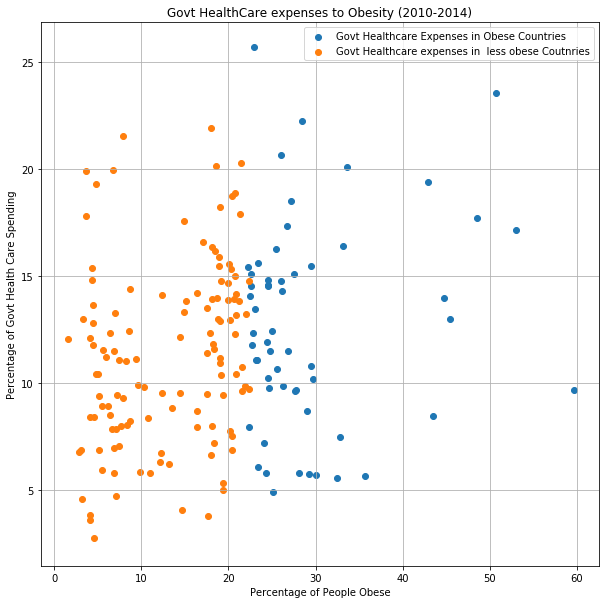

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(HE_OB_plot_top_2014["% Obese"], HE_OB_plot_top_2014["Average"], label="Govt Healthcare Expenses in Obese Countries ")
plt.scatter(HE_OB_plot_rest_2014["% Obese"], HE_OB_plot_rest_2014["Average"], label="Govt Healthcare expenses in  less obese Coutnries")
plt.grid()
plt.legend()
plt.ylabel("Percentage of Govt Health Care Spending")
plt.xlabel("Percentage of People Obese")
plt.title("Govt HealthCare expenses to Obesity (2010-2014)")

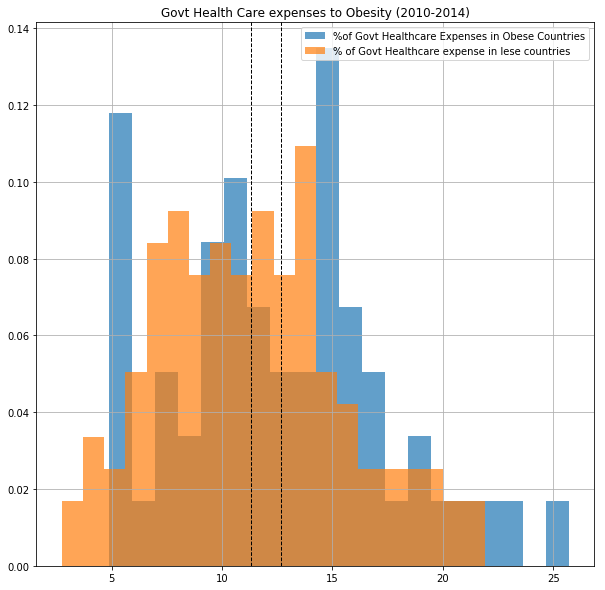

In [22]:
# Histogram Plot of Data
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.hist(HE_OB_plot_top_2014["Average"], 20, density=True, alpha=0.7, label="%of Govt Healthcare Expenses in Obese Countries")
    plt.hist(HE_OB_plot_rest_2014["Average"], 20, density=True, alpha=0.7, label="% of Govt Healthcare expense in lese countries")
    plt.axvline(HE_OB_plot_top_2014["Average"].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(HE_OB_plot_rest_2014["Average"].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()
    plt.title("Govt Health Care expenses to Obesity (2010-2014)")
    plt.show()

In [23]:
Blood_Pressure_df=pd.read_csv("C:/DataAnalytics/BloodPressure_data.csv")

Countries_top_60_name=list(Obese_country_sorted["Entity"].head(n=70))

#print(Countries_top_60_name)

Blood_Pressure_filtered=Blood_Pressure_df[Blood_Pressure_df["Country"].isin(Countries_top_60_name)]
Blood_Pressure_filtered["Country"].nunique()

Blood_Pressure_rest=Blood_Pressure_df[~Blood_Pressure_df["Country"].isin(Countries_top_60_name)]


In [24]:
BP_top_30=Blood_Pressure_filtered[["Country","2005Both sexes","2006Both sexes","2007Both sexes",\
                                                      "2008Both sexes","2009Both sexes"]].copy()


BP_top_30["Average"]=BP_top_30[["2005Both sexes","2006Both sexes","2007Both sexes","2008Both sexes","2009Both sexes"]].mean(axis=1)



Blood_Pressure_rest=Blood_Pressure_df[~Blood_Pressure_df["Country"].isin(Countries_top_60_name)]
#BP_top_30.to_csv("C:/DataAnalytics/BPtop30.csv")

In [25]:
BP_rest=Blood_Pressure_rest[["Country","2005Both sexes","2006Both sexes","2007Both sexes",\
                                                      "2008Both sexes","2009Both sexes"]].copy()
BP_rest["Average"]=BP_rest[["2005Both sexes","2006Both sexes","2007Both sexes","2008Both sexes","2009Both sexes"]].mean(axis=1)

In [26]:
BP_top_30_2014=Blood_Pressure_filtered[["Country","2010Both sexes","2011Both sexes","2012Both sexes","2013Both sexes","2014Both sexes"]].copy()
BP_top_30_2014["Average"]=BP_top_30_2014[["2010Both sexes","2011Both sexes","2012Both sexes","2013Both sexes","2014Both sexes"]].mean(axis=1)
BP_top_30_2014

Country  2010Both sexes  2011Both sexes  \
2                             Algeria            11.4            11.7   
3                             Andorra             7.0             7.0   
6                           Argentina             9.1             9.3   
8                           Australia             5.9             5.9   
11                            Bahamas            11.9            12.0   
12                            Bahrain            11.1            11.2   
14                           Barbados            11.2            11.4   
15                            Belarus             7.5             7.6   
17                             Belize            11.7            11.9   
25                           Bulgaria             7.2             7.3   
31                             Canada             5.5             5.5   
34                              Chile             9.9            10.0   
39                       Cook Islands            26.6            26.8   
40                         Costa Rica             8.4             8.5   
42                            Croatia             6.8             6.9   
43                               Cuba             8.0             8.1   
50                           Dominica            10.3            10.5   
51                 Dominican Republic             9.4             9.6   
53                              Egypt            16.0            16.5   
54                        El Salvador             9.6             9.7   
60                               Fiji            15.9            16.3   
68                             Greece             6.5             6.5   
76                            Hungary             7.4             7.5   
81                               Iraq            15.5            15.9   
82                            Ireland             6.1             6.1   
83                             Israel             6.3             6.3   
85                            Jamaica            10.7            11.0   
87                             Jordan            15.7            16.0   
90                           Kiribati            21.0            21.3   
91                             Kuwait            18.3            18.7   
..                                ...             ...             ...   
106                             Malta             7.7             7.7   
107                  Marshall Islands            20.4            20.5   
110                            Mexico            10.7            10.8   
113                        Montenegro             6.9             7.0   
114                           Morocco            12.3            12.6   
118                             Nauru            29.2            29.2   
121                       New Zealand             6.8             6.8   
122                         Nicaragua             9.5             9.7   
125                              Niue            25.3            25.7   
126                            Norway             5.1             5.1   
127                              Oman            12.5            12.7   
129                             Palau            22.5            22.7   
135                            Poland             7.2             7.3   
137                             Qatar            17.4            17.7   
145  Saint Vincent and the Grenadines             9.9            10.1   
146                             Samoa            22.4            22.9   
148                      Saudi Arabia            16.0            16.3   
158                      South Africa            10.6            10.8   
159                             Spain             7.1             7.1   
162                          Suriname            11.4            11.6   
171                             Tonga            22.3            22.8   
173                           Tunisia            11.4            11.7   
174                            Turkey            12.4            12.7   
176            

In [27]:



BP_rest_2014=Blood_Pressure_rest[["Country","2010Both sexes","2011Both sexes","2012Both sexes","2013Both sexes","2014Both sexes"]].copy()
#BP_rest_2014
BP_rest_2014["Average"]=BP_rest_2014[["2010Both sexes","2011Both sexes","2012Both sexes","2013Both sexes","2014Both sexes"]].mean(axis=1)

In [28]:
Obese_by_country=Obese_filtered.groupby(["Entity"]).mean().reset_index()

Obese_by_country.drop(["Year"],axis=1,inplace=True)
Obese_by_country=Obese_by_country.rename(columns={'Entity':'Country'})
#Obese_by_country


# Sample pop in 2009 from obese 
Obese_bp_top30=Obese_by_country[Obese_by_country["Country"].isin(Countries_top_60_name)]
#Obese_bp_top30["Country"].nunique()
#Rest of the population from non obese 
Obese_Bp_rest=Obese_by_country[~Obese_by_country["Country"].isin(Countries_top_60_name)]

#BP_rest

Obese_BP_plot_top30=pd.merge(Obese_bp_top30,BP_top_30,how="inner",on=["Country"])
Obese_BP_plot_rest=pd.merge(Obese_Bp_rest,BP_rest,how="inner",on=["Country"])

In [29]:
Obese_by_country_2014=Obese_filtered_2014.groupby(["Entity"]).mean().reset_index()

Obese_by_country_2014.drop(["Year"],axis=1,inplace=True)
Obese_by_country_2014=Obese_by_country_2014.rename(columns={'Entity':'Country'})
#Obese_by_country




# Sample pop in 2009 from obese 
Obese_bp_top30_2014=Obese_by_country_2014[Obese_by_country_2014["Country"].isin(Countries_top_60_name)]
#Obese_bp_top30["Country"].nunique()
#Rest of the population from non obese 
Obese_Bp_rest_2014=Obese_by_country_2014[~Obese_by_country_2014["Country"].isin(Countries_top_60_name)]

#BP_rest

Obese_BP_plot_top30_2014=pd.merge(Obese_bp_top30_2014,BP_top_30_2014,how="inner",on=["Country"])
Obese_BP_plot_rest_2014=pd.merge(Obese_Bp_rest_2014,BP_rest_2014,how="inner",on=["Country"])

In [30]:
stats.ttest_ind(Obese_BP_plot_top30["Average"], Obese_BP_plot_rest["Average"], equal_var=False)

Ttest_indResult(statistic=5.910341026638049, pvalue=1.0147770836028669e-07)

Text(0.5, 1.0, 'Prevelane of Blood Pressure in highly Obese Countries')

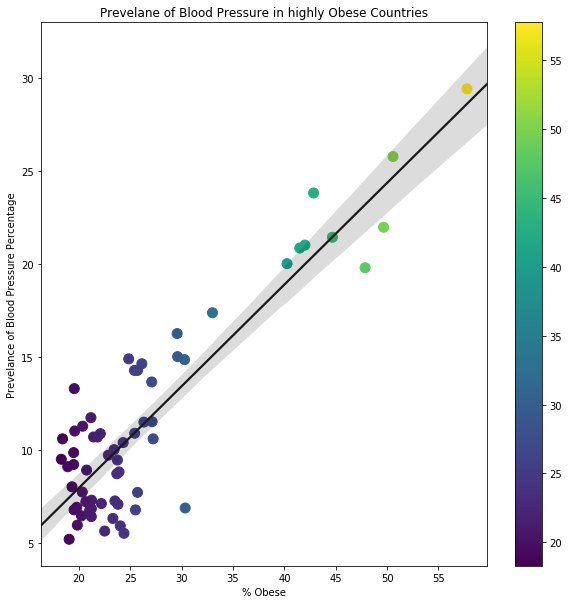

In [31]:
plt.figure(figsize=(10,10))

points = plt.scatter(Obese_BP_plot_top30["% Obese"], Obese_BP_plot_top30["Average"],c=Obese_BP_plot_top30["% Obese"],
                      s=100)
plt.colorbar(points)
#plt.ylabel("Prevelance of Blood Pressure Percentage")
sns.regplot("% Obese", "Average", data=Obese_BP_plot_top30, scatter=False, color=".1")
plt.ylabel("Prevelance of Blood Pressure Percentage")
plt.title("Prevelane of Blood Pressure in highly Obese Countries")

Text(0.5, 1.0, 'Prevelance of Blood Pressure in obese Countries (2004-2009)')

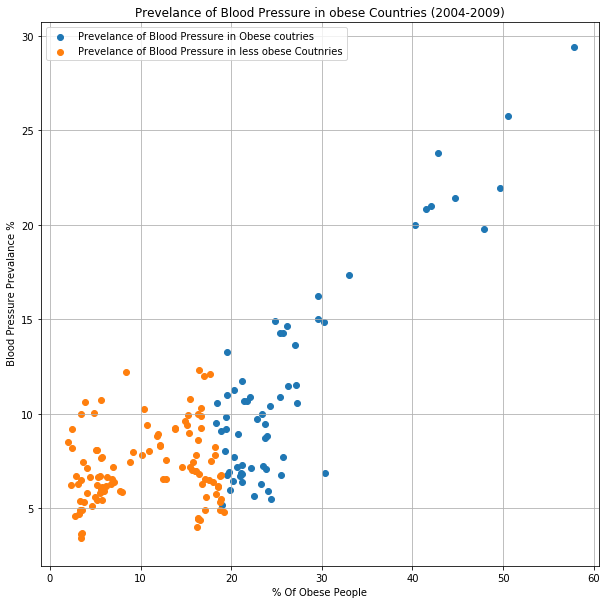

In [32]:
 plt.figure(figsize=(10,10))
 plt.scatter(Obese_BP_plot_top30["% Obese"], Obese_BP_plot_top30["Average"], label="Prevelance of Blood Pressure in Obese coutries ")
 plt.scatter(Obese_BP_plot_rest["% Obese"], Obese_BP_plot_rest["Average"], label="Prevelance of Blood Pressure in less obese Coutnries")
 plt.grid()
 plt.legend()
 plt.xlabel("% Of Obese People")
 plt.ylabel(" Blood Pressure Prevalance %")

 plt.title("Prevelance of Blood Pressure in obese Countries (2004-2009)")

Text(0.5, 1.0, 'Prevelance of Blood Pressure in obese Countries (2004-2009)')

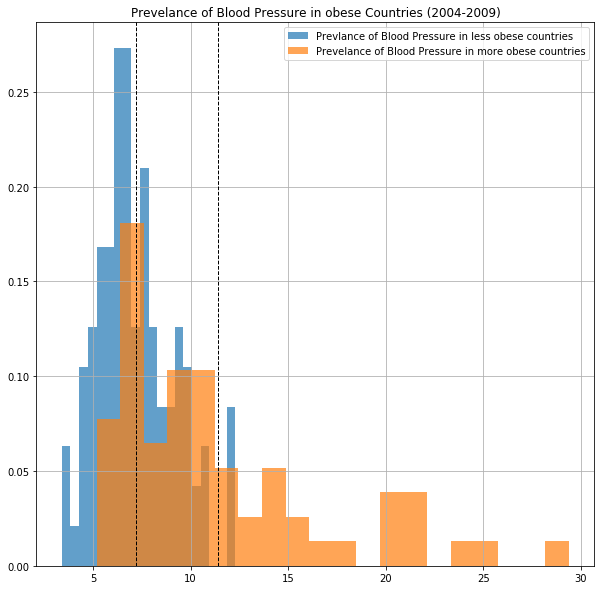

In [33]:
    # Histogram Plot of Data
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.hist(Obese_BP_plot_rest["Average"], 20, density=True, alpha=0.7, label="Prevlance of Blood Pressure in less obese countries")
    plt.hist(Obese_BP_plot_top30["Average"], 20, density=True, alpha=0.7, label="Prevelance of Blood Pressure in more obese countries")
    plt.axvline(Obese_BP_plot_rest["Average"].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(Obese_BP_plot_top30["Average"].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    plt.title("Prevelance of Blood Pressure in obese Countries (2004-2009)")

In [34]:
stats.ttest_ind(Obese_BP_plot_top30_2014["Average"], Obese_BP_plot_rest_2014["Average"], equal_var=False)

Ttest_indResult(statistic=5.658681230759784, pvalue=2.6577976967321723e-07)

Text(0.5, 1.0, 'Prevelane of Blood Pressure in highly Obese Countries( 2009-2014)')

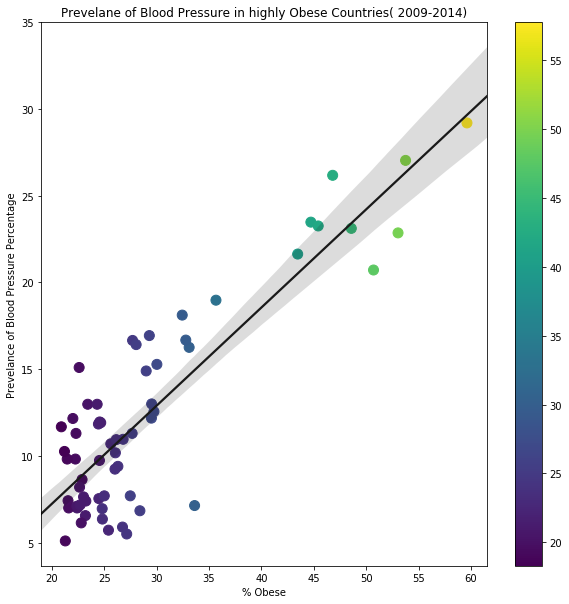

In [35]:
plt.figure(figsize=(10,10))

points = plt.scatter(Obese_BP_plot_top30_2014["% Obese"], Obese_BP_plot_top30_2014["Average"],c=Obese_BP_plot_top30["% Obese"],
                      s=100)
plt.colorbar(points)
#plt.ylabel("Prevelance of Blood Pressure Percentage")
sns.regplot("% Obese", "Average", data=Obese_BP_plot_top30_2014, scatter=False, color=".1")
plt.ylabel("Prevelance of Blood Pressure Percentage")
plt.title("Prevelane of Blood Pressure in highly Obese Countries( 2009-2014)")

Text(0, 0.5, 'Prevelance of Blood Pressure %')

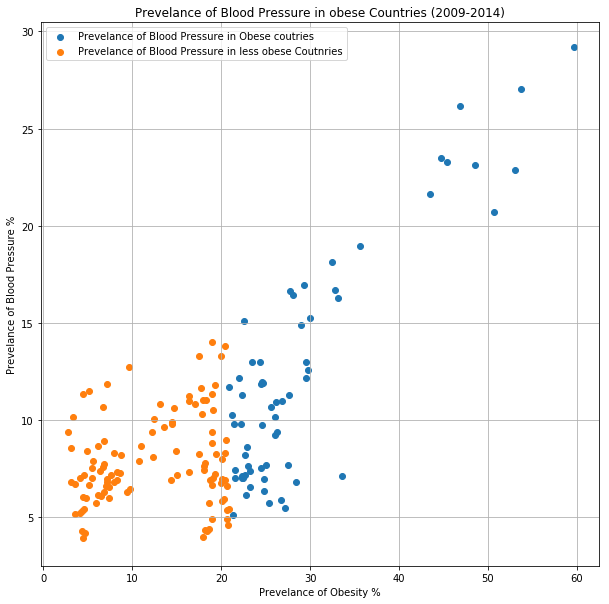

In [36]:
 plt.figure(figsize=(10,10))
 plt.scatter(Obese_BP_plot_top30_2014["% Obese"], Obese_BP_plot_top30_2014["Average"], label="Prevelance of Blood Pressure in Obese coutries ")
 plt.scatter(Obese_BP_plot_rest_2014["% Obese"], Obese_BP_plot_rest_2014["Average"], label="Prevelance of Blood Pressure in less obese Coutnries")
 plt.grid()
 plt.legend()

 plt.title("Prevelance of Blood Pressure in obese Countries (2009-2014)")
plt.xlabel("Prevelance of Obesity %")
plt.ylabel("Prevelance of Blood Pressure %")